In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
eps = np.finfo(float).eps
from numpy import log2 as log
import pprint

Reading the Dataset

In [11]:
df=pd.read_csv('/content/play_tennis.csv') # download a csv tennis file.
df = df.drop('day',axis=1)

df.head(14)

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Implement Used Functions
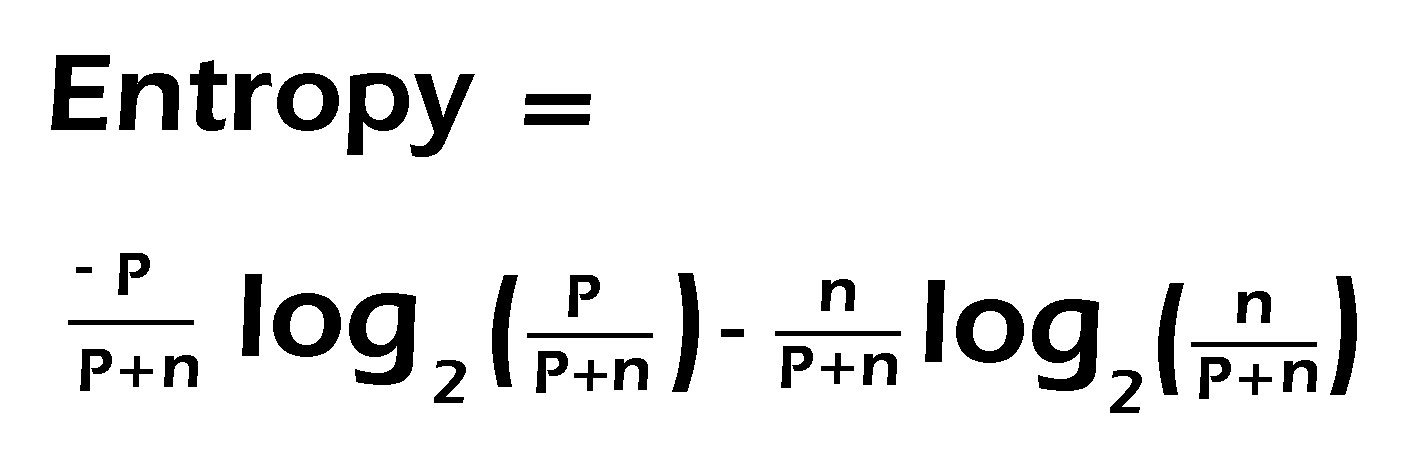

In [12]:
def find_entropy(df):
    #target column
    target = df.keys()[-1]
    entropy = 0
    values = df[target].unique()
    #calc entropy
    for value in values:
        fraction = df[target].value_counts()[value]/len(df[target])
        entropy += -fraction*np.log2(fraction)
    return entropy



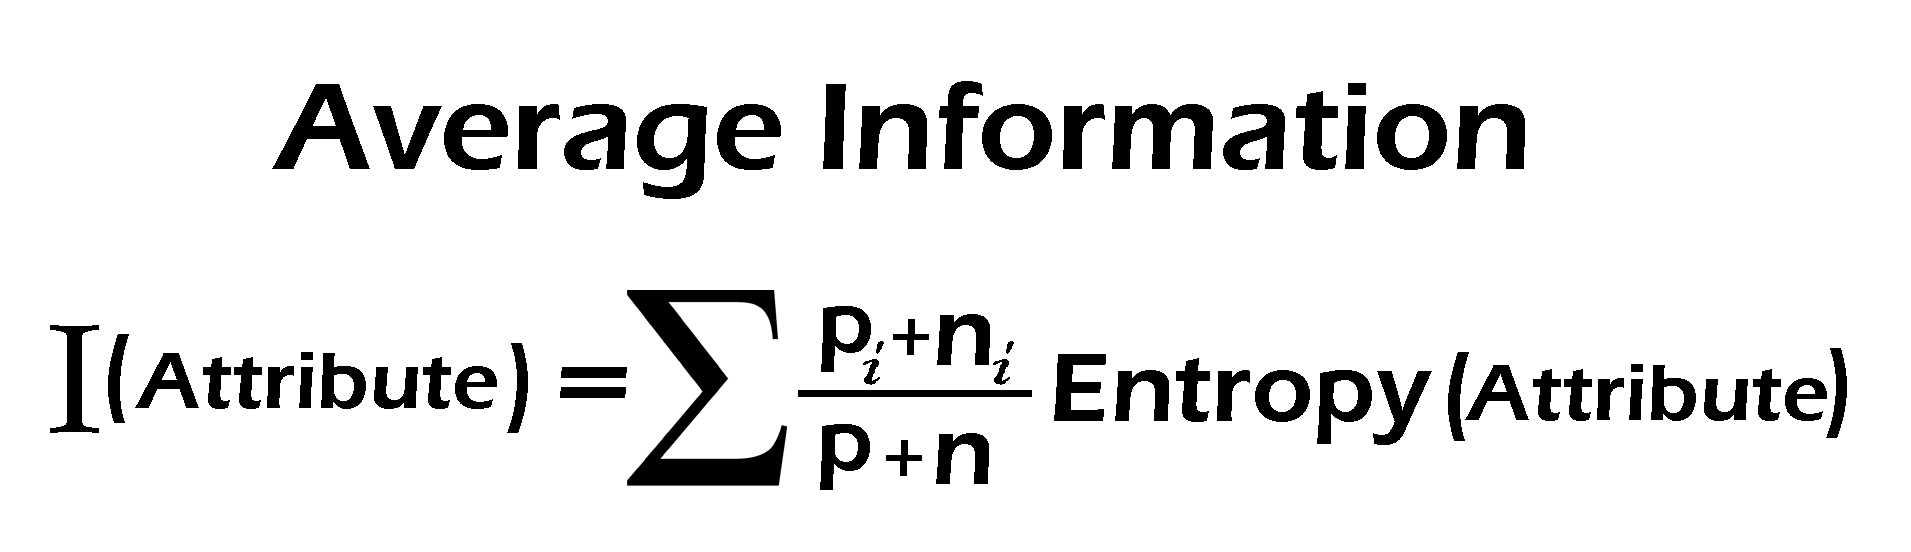

In [13]:
def average_information(df,attribute):
  target = df.keys()[-1]   #target column
  target_variables = df[target].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[target] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)

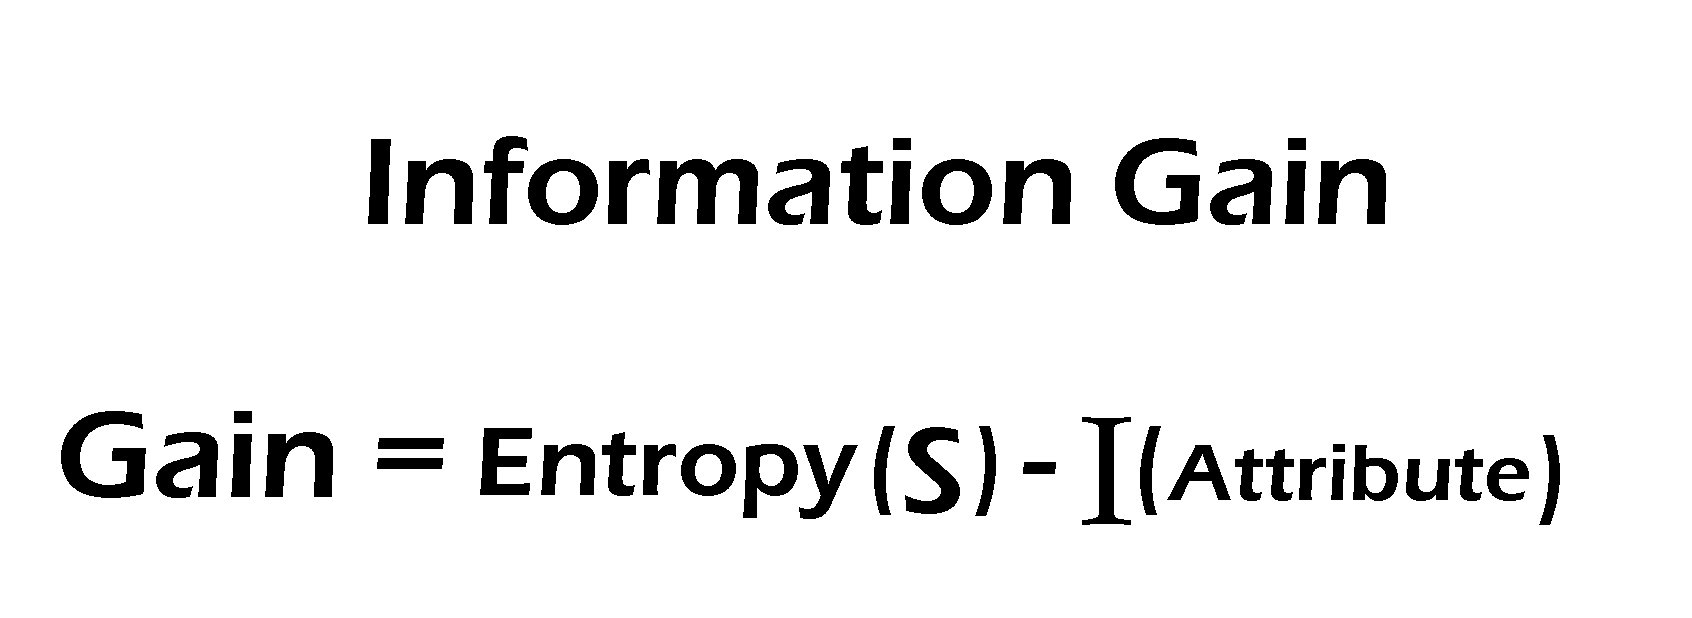

In [14]:
def find_winner(df):
    IG = []
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-average_information(df,key))
    return df.keys()[:-1][np.argmax(IG)]

def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)

In [15]:
def buildTree(df,tree=None):
    target = df.keys()[-1]   #target column

    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)

    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])

    #Create an empty dictionary to create tree
    if tree is None:
        tree={}
        tree[node] = {}

    #We make loop to construct a tree by calling this function recursively.
    #In this we check if the subset is pure and stops if it is pure.

    for value in attValue:

        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[target],return_counts=True)

        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) #Calling the function recursively

    return tree


In [16]:
#build Tree
tree = buildTree(df)

pprint.pprint(tree)


{'outlook': {'Overcast': 'Yes',
             'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}


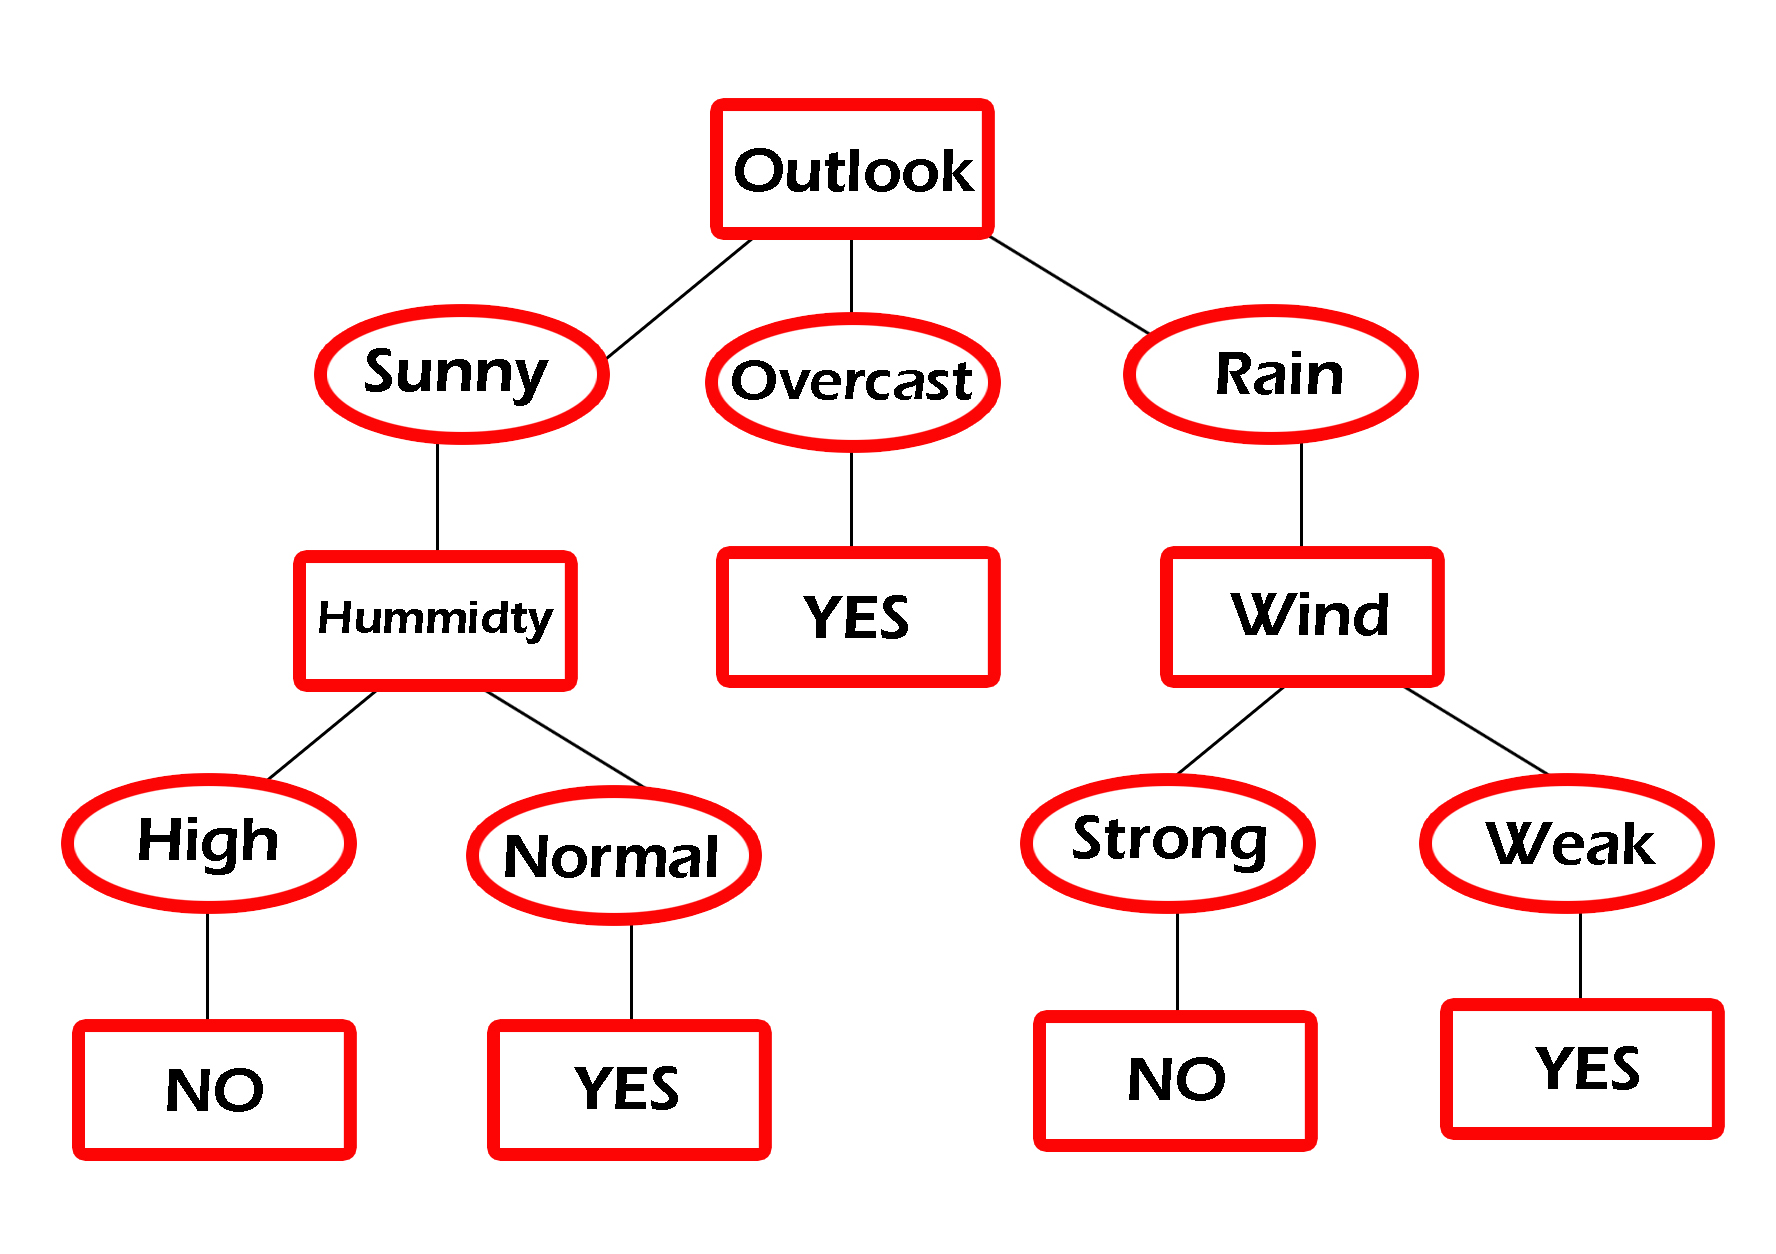